In [ ]:
import re, glob, os, pathlib, subprocess
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import msgpack
from collections import defaultdict

import pandas as pd
import seaborn as sns
import numpy as np


import datashader as ds
import datashader.transfer_functions as tf

In [2]:
def stats_wcc(path_figure, path_stats, format='pdf',
              storage_path=None
              ):
    if storage_path:
        D = pd.read_msgpack(storage_path + "df_wcc.mspk")
        with open(storage_path + "anomalies_in_wcc.mspk", 'rb') as input:
            wcc_with_anomalies = set([i.decode("utf-8") for i in msgpack.load(input)])
    print("WCC with anomalies :", wcc_with_anomalies)
    # describe_to_latex_landscape(D, path_stats,title= "Weakly Connected Components")
    D['id'] = [int(i) for i in D.index]
    D_without_anomalies = D.loc[list(set(D.index) - wcc_with_anomalies)]
    D_with_anomalies = D.loc[list(wcc_with_anomalies)]
    print("D with anomalies :",D_with_anomalies.shape)
    print("D without anomalies :",D_without_anomalies.shape)

    for c in D.columns:
        if c != 'id':
            print("Plotting ", c)
            fig, ax = plt.subplots(1, 1)
            ax = sns.distplot(D[c], bins=50, ax=ax,
                              hist_kws={'alpha': 0.5, 'ec': '#510438', 'fc': '#a8508b', 'linewidth': '1'}, kde=False)
            ax.set_xlabel(c)
            ax.set(yscale="log")
            ax.set_title("Histogram of the " + c)
            fig.savefig(path_figure + "/histogram_" + c + "_wcc.pdf", format=format)
            plt.close(fig)

            fig, ax = plt.subplots(1, 1)
            ax = D_without_anomalies.plot(x='id', y=c, kind='scatter', ax=ax,s=10, alpha=0.3, color='#a8508b', linewidth='0.5')
            ax = D_with_anomalies.plot(x='id', y=c, kind='scatter', ax=ax,s=20, alpha=0.7, color='#cc2900', linewidth='0.5')
            ax.set_xlabel(c)
            ax.set(yscale="log")
            ax.set_title("Scatter plot of the " + c)
            fig.savefig(path_figure + "/scatter_plot_" + c + "_wcc.pdf", format=format)
            plt.close(fig)
#     D.drop(columns=['id'], inplace=True)
    return D_with_anomalies,D_without_anomalies

In [3]:
__directory__ = "/home/leo/Dev/Data_Stream/2017/07/"
__filedate__ = "20170728"


__directory__ = "/home/leo/Dev/Data_Stream/Rollernet/"
__filedate__ = "rollernet"

storage_path_wcc = __directory__ + __filedate__ + "_wcc_storage/"
path_figure = __directory__ + "figures/"
path_stats = __directory__ + "stats/"

preprocess_data_path = __directory__ + "preprocess_data/"

In [4]:
if preprocess_data_path:
    D = pd.read_msgpack(preprocess_data_path + "df_wcc.mspk")
    with open(preprocess_data_path + "anomalies_in_wcc.mspk", 'rb') as input:
        wcc_with_anomalies = set([i.decode("utf-8") for i in msgpack.load(input)])
        
    D['id'] = [int(i) for i in D.index]
    D_without_anomalies = D.loc[list(set(D.index) - wcc_with_anomalies)]
    D_with_anomalies = D.loc[list(wcc_with_anomalies)]
    D['cat'] = ['anomalous' if i in wcc_with_anomalies else 'normal' for i in D.index ]
    D['cat']=D['cat'].astype('category')

ValueError: path_or_buf needs to be a string file path or file-like

In [ ]:
c = "Surface"

In [48]:
aggc = ds.Canvas(x_range=(0,len(D.index)),y_range=(1,max(D[c].values)),
                             x_axis_type='linear',y_axis_type='log').points(D,'id',c,ds.count_cat('cat'))
color_key = dict(anomalous='red', normal='blue')

""

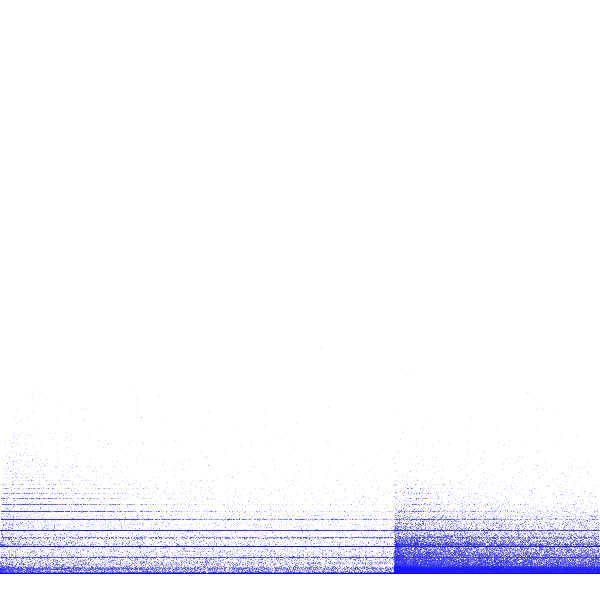

In [49]:
tf.Images(tf.shade(aggc,color_key=color_key))

987609     2
663605     2
859805     2
517786     2
815879     2
419409     2
985348     2
629233     2
833210     2
25312      2
321376     2
570978     2
931915     2
896946     2
449195     2
740731     2
958029     2
213090     2
960711     2
29895      2
52674      2
1119994    2
697698     2
880982     2
239493     2
426680     2
76138      2
57640      2
944995     2
783019     2
          ..
435372     2
476916     2
861603     2
848562     2
676963     2
783445     2
75654      2
669453     2
1036563    2
640817     2
719084     2
720396     2
1020010    3
159598     2
146074     2
878223     2
647031     2
394709     2
675949     2
139041     2
75374      2
948616     2
527624     2
801811     2
406753     2
450765     3
856968     2
280497     2
635635     2
555888     2
Name: Nb_of_nodes, Length: 1121930, dtype: int64
